
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import numpy 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

def plot_loss_acc(history_dict, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    ax1.plot(epochs, loss_values, 'k:', label='training loss')
    ax1.plot(epochs, val_loss_values, 'b--', label='validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title(title)

    ax2.plot(epochs, acc_values, 'k:', label='training accuracy')
    ax2.plot(epochs, val_acc_values, 'b--', label='validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title(title)
    plt.tight_layout()
    plt.show()

In [3]:
def model_builder():    
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()
    #   第二步：構建網絡層
    model.add(Dense( 32,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense( 32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense( 32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())
    
    # 輸出模型摘要資訊
#     model.summary()
    
    return model

In [4]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
# Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
# Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## 1. 調整batch size, epoch

... optimizer=adam, batch_size=256, epochs=20
Total Parameters：28618


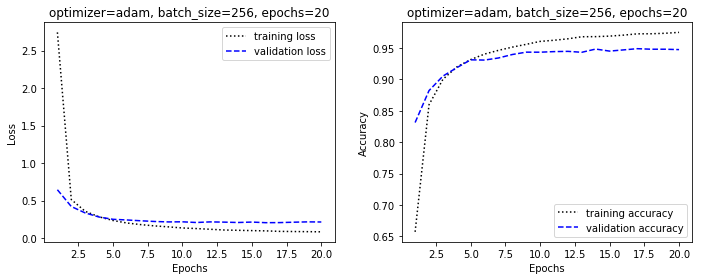

... optimizer=adam, batch_size=256, epochs=30
Total Parameters：28618


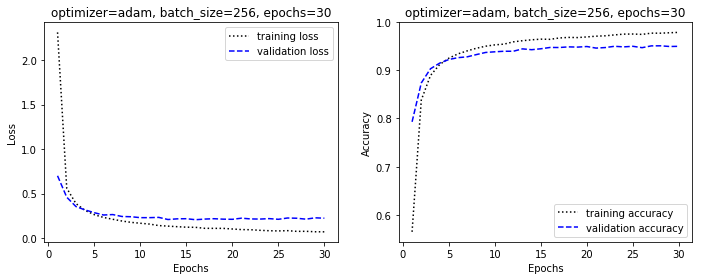

... optimizer=adam, batch_size=512, epochs=20
Total Parameters：28618


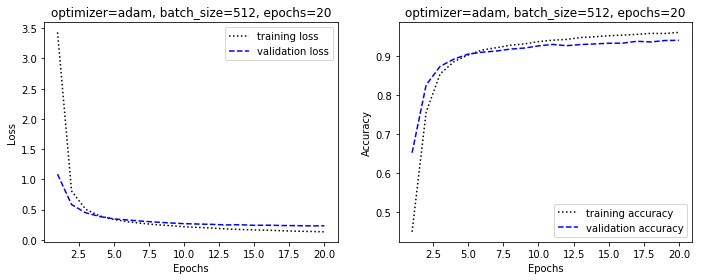

... optimizer=adam, batch_size=512, epochs=30
Total Parameters：28618


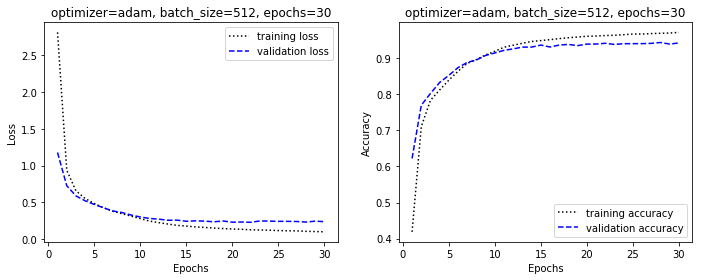

In [5]:
# 第三步：編譯
for optimizer in ['adam']:
    for batch_size in [256, 512]:
        for epochs in [20, 30]:
            title = f"optimizer={optimizer}, batch_size={batch_size}, epochs={epochs}"
            print(f"... {title}")
            
            model = model_builder()
            model.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

            history = model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs, 
                                verbose=0,
                                validation_split=0.25)

            
            plot_loss_acc(history.history, title=title)

## 2. 分別驗證 SGD, Adam, Rmsprop 的 accurancy

... optimizer=adam, batch_size=512, epochs=20
Total Parameters：28618


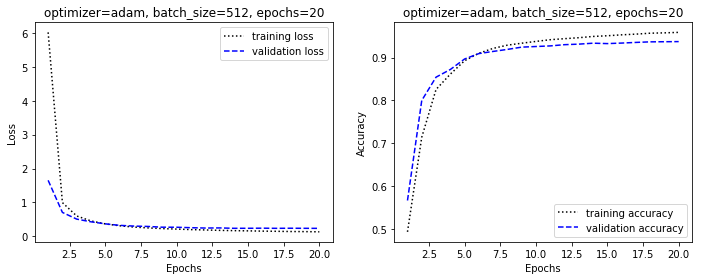

... optimizer=sgd, batch_size=512, epochs=20
Total Parameters：28618


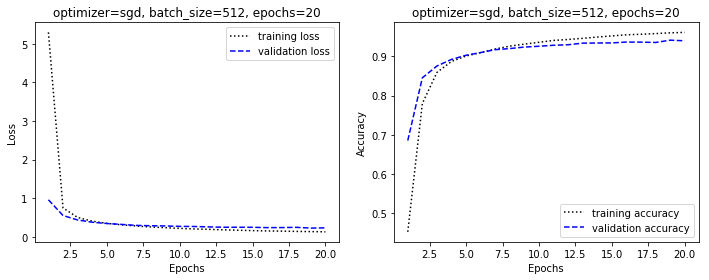

... optimizer=rmsprop, batch_size=512, epochs=20
Total Parameters：28618


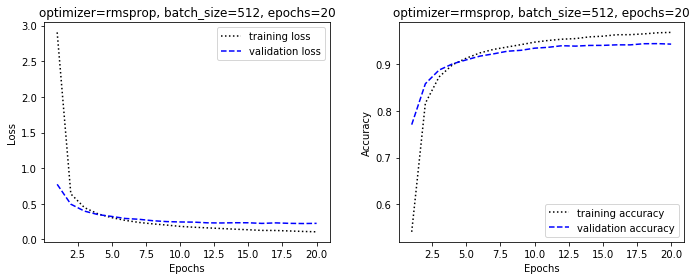

In [6]:
# 第三步：編譯
for optimizer in ['adam', 'sgd', 'rmsprop']:
    for batch_size in [512]:
        for epochs in [20]:
            title = f"optimizer={optimizer}, batch_size={batch_size}, epochs={epochs}"
            print(f"... {title}")
            
            model = model_builder()
            model.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

            history = model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs, 
                                verbose=0,
                                validation_split=0.25)

            
            plot_loss_acc(history.history, title=title)

In [7]:
#    第六步：輸出
model = model_builder()
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, Y_train,
        batch_size=128,
        epochs=8, 
        verbose=0)

evaluation = model.evaluate(X_test, Y_test)

print(f"loss = {evaluation[0]:.3f}, accuracy={evaluation[1]:.3f}")

Total Parameters：28618
10000/10000 [==============================] - 0s 33us/step
loss = 0.172, accuracy=0.954
